<a href="https://colab.research.google.com/github/hamzachikhaoui2/MECH501/blob/main/Assignment2_MECH_501_Part_1_HamzaChikhaoui.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MECH 501 Assignment 2 :
## *Can convolutional neural networks (CNNs) be used for defect detection and identification on screws in a few shot learning environment ?*
**Part 1  :**  Investigation of a classic CNN architecture.

**Hamza Chikhaoui**

**Student ID: 260912960**

**Subject : 6 dimensional classifier in few shot learning environnment.**

**Abstract**

The goal of this project is to be able to asses the state of a screw (i.e. the presence or absence of a defect on the screw, and the nature of the defect if any). To do so, the development of a multi-dimensional Convolutional Neural Network classifier was done.
Another ambitious goal of this assignment is to do so in a few shot learning environment. That is, to use about 20 images per class for the training of the neural network.
After the implementation of various data augmentation techniques and mutiple machine learning methods, a maximum validation accuracy of 50 % was achieved, which is close from 3 times the expected baseline output of 16.6% (random baseline for a 6 dimension classifier).





**Motivation**

The field of mechanical engineering has been increasingly using machine learning methods for defect detection[1]. Indeed, techniques such as pattern recognition via Convolutional Neural Networks (CNN) can provide a quick and affordable alternative to lengthy and expensive mechanical tests.

Furthermore, when it comes to the use of screws in any assembly, due to time and monetary constraints, it is ofter rare to implement tensile tests for every type of screw used. Then, more often than not, one generates an estimate of the end of life of the screw based of its frequency and duration of use. This can in turn be time consuming, and only provide an estimate based on the material of the screw and some estimate of how much it was used.

Machine learning can offer a cheap, consistent and non-destructuve alternative to highlight the presence of defects on a screw, and the nature of the defect if any.

A potential challenge to the implementation of machine learning models for defect detection is the lack of available data. This is why this project attempts to create a model in a few shot leanring  environment.

**Context**

This report uses some machine learning principles. This section aims to provide some context about most of the techniques used in this paper.

*Convolutional Neural Networks (CNN) :*

> CNN's are the primarily type of neural networks used for image processing and pattern detection. All in all, a CNN can be considered to be a model that can extract features from some input data (images here) using layers of filters and a neural network. A CNN therefore allows the recognition of objects and patterns (defects in our context) in image data.

*Few Shot learning:*

> Few shot learning is the problem of making predictions based on a limited number of samples.

*Random Baseline:*

> The minimum accuracy our model should achieve. Here, for a 6 dimension classifier, the accuracy given by a random classification is 100/6 %, which is 16.5%. This assumes that for this specific implementation, it is as wrong to mislabel a defect as it is to detect a defect when there is none.

*Pre-trained neural Network*


> A pre-trained neural network is a machine learning model that has already been trained on a large dataset for a specific task, such as image recognition. Instead of starting from scratch, these models can be repurposed for different applications by leveraging the knowledge they gained during their initial training.


**Dataset**

In our case , our dataset is composed of 6 classes of about 20 images per class. The classes are the following:

1. 'scratch_head' - a screw with a scratched head.
2.  'manipulated_front' - a screw where the defect (on the fron of the screw) is due to a mismanipulation of the screw.
3. 'scratch_neck', - a screw with a scratched neck.
4.  'good', - a screw with no defect.
5.  'thread_top', - a screw with a defect on the top of the thread.
6. 'thread_side' -  a screw with a defect on the side of the thread.

The exact breakdown of the number of samples used for training and validation is available in the "Loading the data" section of this report

**Expected Results**

We expect the models we will develop to achieve an accuracy higher than the random baseline of 16.5%. However, achieving a high accuracy with so few samples is a challenging task.


#Part 1 : Construction and optimization of a regular CNN for defect detection on screws

#Imports



In [ ]:
# Dependencies Part 1
!pip install tensorflow
!pip install google-colab
!pip install matplotlib
!pip install opencv-python
!pip install numpy
!pip install scikit-learn
!pip install keras
!pip install torch
!pip install torchvision

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 8.1 MB/s eta 0:00:00
ERROR: Could not find a version that satisfies the requirement torch==1.10.0 (from versions: 1.11.0, 1.12.0, 1.12.1, 1.13.0, 1.13.1, 2.0.0, 2.0.1, 2.1.0, 2.1.1)
ERROR: No matching distribution found for torch==1.10.0


In [ ]:
import tensorflow as tf
import os
from google.colab import drive
import matplotlib.pyplot as plt
import cv2
import imghdr
import numpy as np
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import image
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.image import grayscale_to_rgb
from re import X
import keras
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras import layers, models
from keras.models import load_model
from tensorflow.keras.layers import BatchNormalization
import pickle
import numpy as np
from tensorflow import keras
from matplotlib import pyplot as plt
from IPython.display import clear_output
import matplotlib.pyplot as plt
import pickle
from tensorflow.keras.models import load_model


#Further Setup


In [ ]:
#upload the paths to the needed directories here :

directoryFullTest = '/content/myDrive/MyDrive/Data sets assignment 2/Full-test'

# Load model paths and corresponding history paths
model_paths = ['/content/myDrive/MyDrive/Data sets assignment 2/models/cnn_model (1).h5', '/content/myDrive/MyDrive/Data sets assignment 2/models/cnn_model_augmented (2).h5', '/content/myDrive/MyDrive/Data sets assignment 2/models/pre_trained_cnn (1).h5']   #update Paths
history_paths = ['/content/myDrive/MyDrive/Data sets assignment 2/Histories/history_file.pkl',
                 '/content/myDrive/MyDrive/Data sets assignment 2/Histories/history_file2.pkl',
                 '/content/myDrive/MyDrive/Data sets assignment 2/Histories/history_file3.pkl']  #Update Paths

In [ ]:
#Loading images from GoogleDrive
#If the images won't be loaded on Google Drive, feel free to change the path to the chosen directory in the indicated field.

#If you will not be using google drive to load the files, feel free to delete this line.


drive.mount('/content/myDrive')

Mounted at /content/myDrive


In [ ]:
#Connect to a GPU if available. The output of this cell should read something similar to this  : [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
#The code is also designed to be able to run on CPU.

gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

tf.config.list_physical_devices('GPU')

[]

#Loading the data


In [ ]:
#Creating Data and Validation Sets


data, validation_data = tf.keras.utils.image_dataset_from_directory(
    directoryFullTest,
    labels='inferred',
    label_mode='int',
    color_mode='rgb',
    shuffle = True,
    batch_size=15,  # Adjust batch
    image_size=(224, 224),# Adjust image resolution
    validation_split = 0.2,
    crop_to_aspect_ratio = True,
    subset="both",
    seed=1337  # Use the same seed value for training and validation set to prevent overlap.
)



Found 160 files belonging to 6 classes.
Using 128 files for training.
Using 32 files for validation.


In [ ]:
#Counting the number of samples per class for the training set

samples_per_class_data = {class_name: 0 for class_name in data.class_names}
#For the training data set:
for images, labels in data:
    for label in labels.numpy():
        class_name = data.class_names[label]
        samples_per_class_data[class_name] += 1


print("For the training data set, we have the following breakdown of samples per class: ")
# Print the count of samples per class
for class_name, count in samples_per_class_data.items():
    print(f"Class: {class_name}, Samples: {count}")

For the training data set, we have the following breakdown of samples per class: 
Class: good, Samples: 35
Class: manipulated_front, Samples: 21
Class: scratch_head, Samples: 17
Class: scratch_neck, Samples: 18
Class: thread_side, Samples: 18
Class: thread_top, Samples: 19


In [ ]:
#Counting the number of samples per class for the validation set

samples_per_class_validation = {class_name: 0 for class_name in data.class_names}


#For the validation data set :
for images, labels in validation_data:
    for label in labels.numpy():
        class_name = data.class_names[label]
        samples_per_class_validation[class_name] += 1

# Print the count of samples per class
print("For the validation data set, we have the following breakdown of samples per class: ")
for class_name, count in samples_per_class_validation.items():
    print(f"Class: {class_name}, Samples: {count}")

For the validation data set, we have the following breakdown of samples per class: 
Class: good, Samples: 6
Class: manipulated_front, Samples: 3
Class: scratch_head, Samples: 7
Class: scratch_neck, Samples: 7
Class: thread_side, Samples: 5
Class: thread_top, Samples: 4


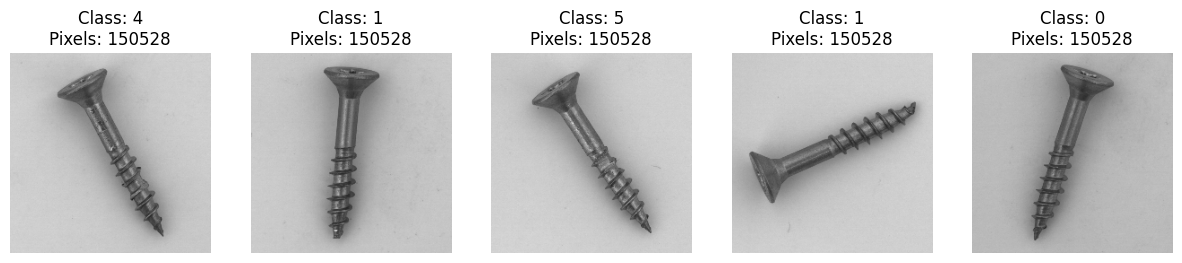

In [ ]:


# Get a batch of images and labels from the dataset
for images, labels in data.take(1):  # Take one batch for visualization
    # Plot the images with their corresponding labels and pixel count
    plt.figure(figsize=(15, 5))
    for i in range(5):  # Assuming batch_size is 5
        ax = plt.subplot(1, 5, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        num_pixels = images[i].numpy().size  # Get the total number of pixels
        plt.title(f"Class: {labels[i].numpy()}\nPixels: {num_pixels}")
        plt.axis("off")
    plt.show()


In [ ]:
# Initialize empty lists to store images and labels

#For training set
X_train = []
Y_train = []

# Iterate through the dataset and separate images and labels
for images, labels in data:
    X_train.extend(images.numpy())
    Y_train.extend(labels.numpy())

X_train_array = np.array(X_train)
Y_train_array = np.array(Y_train)



#For validation set
X_validate = []
Y_validate = []

# Iterate through the dataset and separate images and labels
for images, labels in validation_data:
    X_validate.extend(images.numpy())
    Y_validate.extend(labels.numpy())

X_validate_array = np.array(X_validate)
Y_validate_array = np.array(Y_validate)



#Experiment 1 : CNN 6 dimensions classifier, no augmentation or processing on data.

In [ ]:
# This class is used to be able to plot (live) the accuracy on the training set and on the validation set for each epoch.
# Moreover, this class also allows us to plot the value of the loss function (here sparse categorical crossentropy)
# because our data set is multiclass where the labels are integers.


class PlotLearning(keras.callbacks.Callback):
    """
    Callback to plot the learning curves of the model during training.
    """
    def on_train_begin(self, logs={}):
        self.metrics = {}
        for metric in logs:
            self.metrics[metric] = []


    def on_epoch_end(self, epoch, logs={}):
        # Storing metrics
        for metric in logs:
            if metric in self.metrics:
                self.metrics[metric].append(logs.get(metric))
            else:
                self.metrics[metric] = [logs.get(metric)]

        # Plotting
        metrics = [x for x in logs if 'val' not in x]

        f, axs = plt.subplots(1, len(metrics), figsize=(15,5))
        clear_output(wait=True)

        for i, metric in enumerate(metrics):
            axs[i].plot(range(1, epoch + 2),
                        self.metrics[metric],
                        label=metric)
            if logs['val_' + metric]:
                axs[i].plot(range(1, epoch + 2),
                            self.metrics['val_' + metric],
                            label='val_' + metric)

            axs[i].legend()
            axs[i].grid()

        plt.tight_layout()
        plt.show()


callbacks_list = [PlotLearning()]


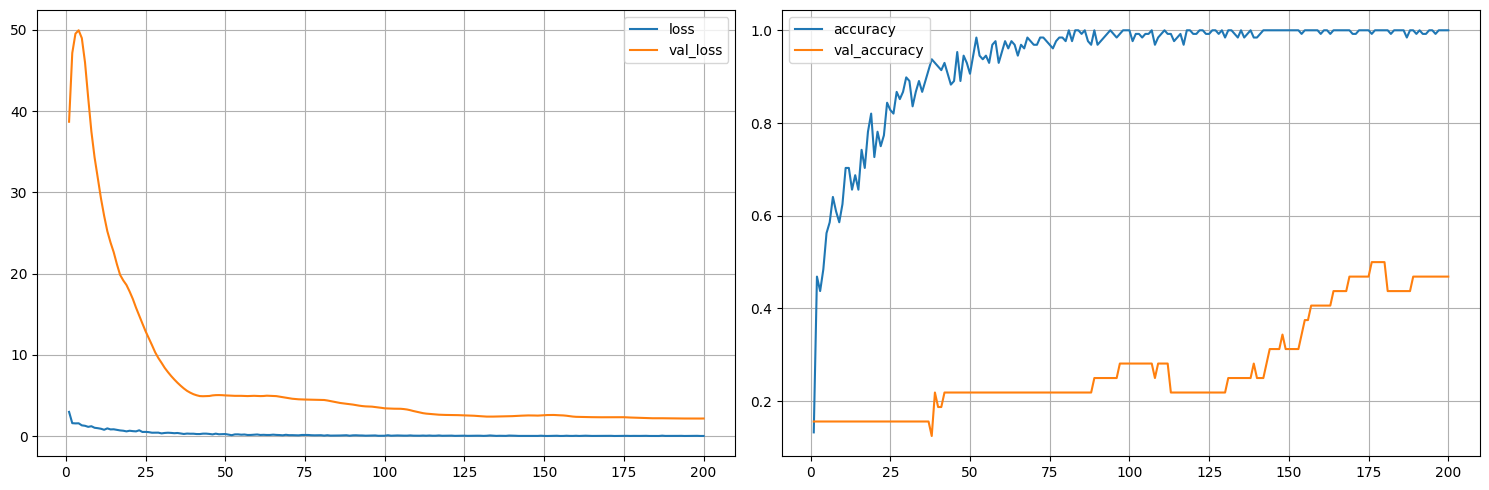

2/2 [==============================] - 1s 984ms/step - loss: 0.0135 - accuracy: 1.0000 - val_loss: 2.1634 - val_accuracy: 0.4688


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Define the CNN model architecture #1
# Using the base data set, no augmentation
#The final architecture available here is the result of multiple rounds of iterations.



model1 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Flatten(),

    Dense(500, activation='relu'),  # Replaced softmax with relu for hidden layers
    BatchNormalization(),
    Dropout(0.5),  # Adjusted dropout rate

    Dense(400, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),

    Dense(300, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),

    Dense(6, activation='softmax')  # Softmax for the output layer
])


# Compile the model
model1.compile(optimizer=Adam(learning_rate=0.0001), loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
epochs = 200
batch_size = 100
hist1 = model1.fit(x = X_train_array, y = Y_train_array, batch_size = 100, epochs=epochs, shuffle = True, validation_data = validation_data,
                 callbacks = callbacks_list)



#The following line is used to save the model. As the model has already been trained, there is no need to use this line
#model1.save('cnn_model.h5')

In [ ]:
#Code to use the previously found weights to load the model:


model1 = load_model(model_paths[0])
hist1 = model1.evaluate(validation_data,  batch_size = 120,
                 callbacks = callbacks_list)

3/3 [==============================] - 2s 286ms/step - loss: 2.1634 - accuracy: 0.4688


The following graph plots the training loss and validation loss (on the left) and the training and validation accuracy (right).

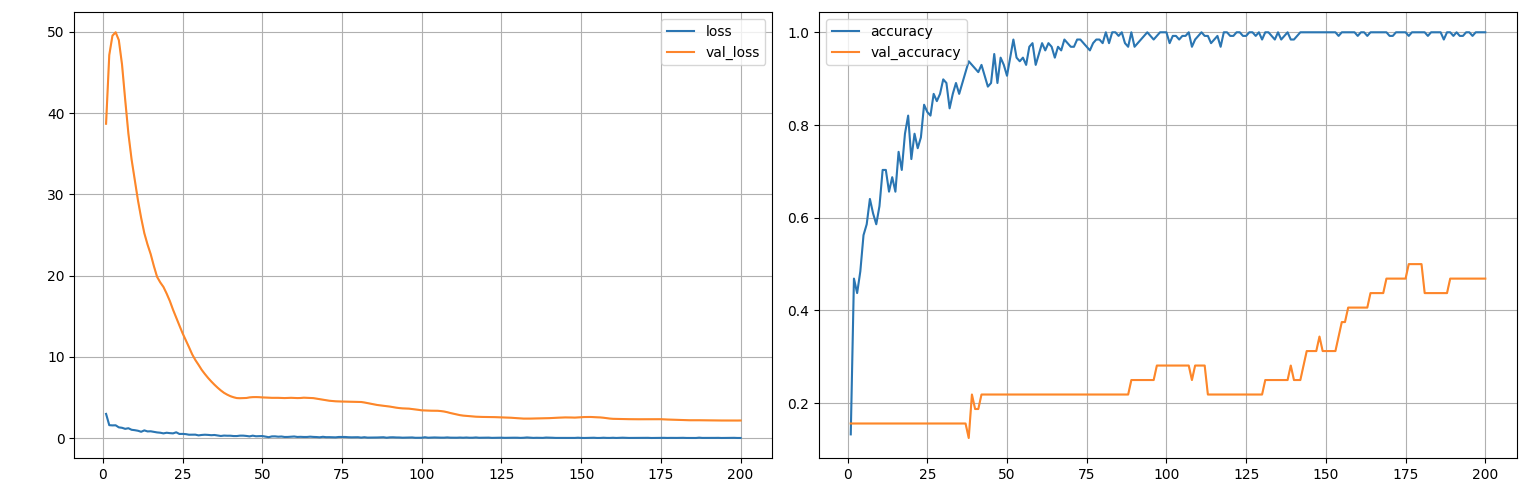

As one can see above, the results obtained are much higher than the random baseline set to be 16.5% for this project.

As per the obtained results, the accuracy is of 46.88%, which is already about 3 times the baseline accuracy for this model.

The accuracy on the validation set spikes over 50% towards the end of the training, which is expected.

We can also note that because of how well we are performing on the training dataset, we can suppose that our model is likely overfitted (to a certain extent). Again, because there is very few samples on the training set, this outcome is also expected (to the extent that we are restricted to a limited training dataset).

In the following code, we will attempt to achieve an even higher accuracy on the validation set by augmenting the data (introducing rotations, scaling of images), and adding the augmented samples to our original dataset.

# Experiment 2 : Introduce noise and augmented samples to the dataset

In [ ]:

# Initialize empty lists to store images and labels
X_train = []
Y_train = []

# Iterate through the dataset and separate images and labels
for images, labels in data:
    X_train.extend(images.numpy())
    Y_train.extend(labels.numpy())

# Convert the lists to NumPy arrays
X_train = np.array(X_train)
Y_train = np.array(Y_train)

# Print the shapes of x_train and y_train to verify that both are of the same length
print("Shape of x_train:", X_train.shape)
print("Shape of y_train:", Y_train.shape)

Y_train = np.array(Y_train, dtype=np.int64)

# Check the shape of X_train and convert it to 4D if necessary to account for RGB colors.
if len(X_train.shape) == 3:
    X_train = np.expand_dims(X_train, axis=-1)

# Define a new data generator that will generate all the augmentations we need
datagen = ImageDataGenerator(
    rotation_range=40, #Randomly rotates samples with an angle of 40 degrees
    width_shift_range=0.2, #Randomly shifts images horizontally by a fraction of the total width. Here, 20% of the total width will be randomly shifted.
    height_shift_range=0.2, #Same as width shift, but for the height.
    shear_range=0.2, #Shearing the image samples
    zoom_range=0.2, #Zooming on the samples. Here, the maximum zoom is of 20 %.
    horizontal_flip=True #Randomly flipping the images horizontally.
)


# Fit the model
batch_size = 60
epochs = 250
augmented_data = datagen.flow(X_train, Y_train, batch_size = batch_size)

num_augmented_samples = 500 #Augment the data to 504 samples

augmented_images = []
augmented_labels = []

for _ in range(num_augmented_samples // batch_size):
    augmented_batch_images, augmented_batch_labels = next(augmented_data)
    augmented_images.append(augmented_batch_images)
    augmented_labels.append(augmented_batch_labels)

# Concatenate the original and augmented datasets
new_images = np.concatenate([X_train] + augmented_images, axis=0)
new_labels = np.concatenate([Y_train] + augmented_labels, axis=0)

print(f"The new number of sample images is: {len(new_images)}, for a corresponding number of labels equal to: {len(new_labels)}")


Shape of x_train: (128, 224, 224, 3)
Shape of y_train: (128,)
The new number of sample images is: 504, for a corresponding number of labels equal to: 504


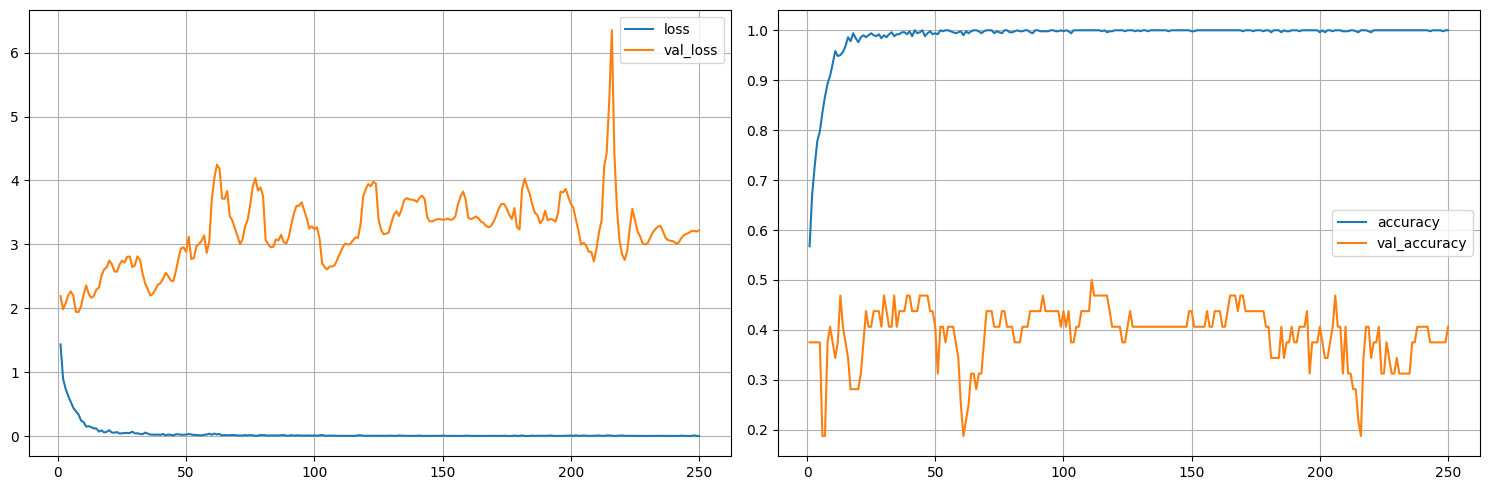

9/9 [==============================] - 2s 266ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 3.2190 - val_accuracy: 0.4062


In [ ]:
# Define the CNN model architecture #2 (which is the same as the one used in experiment 1 for consistency purposes)
# Using the augmented dataset

# Compile the model
model2 = model1 #Same model as before
model2.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#Train the model
hist2 = model2.fit(
    new_images, new_labels,
    epochs=epochs,
    validation_data=validation_data ,
    callbacks=callbacks_list,
    batch_size = batch_size
)

# Save the model (already saved and submited alongside this assignment)
#model2.save('cnn_model_augmented.h5')


The following graph plots the training loss (loss) and validation loss(val_loss) (on the left) and the training (accuracy) and validation accuracy (val_accuracy) (right).


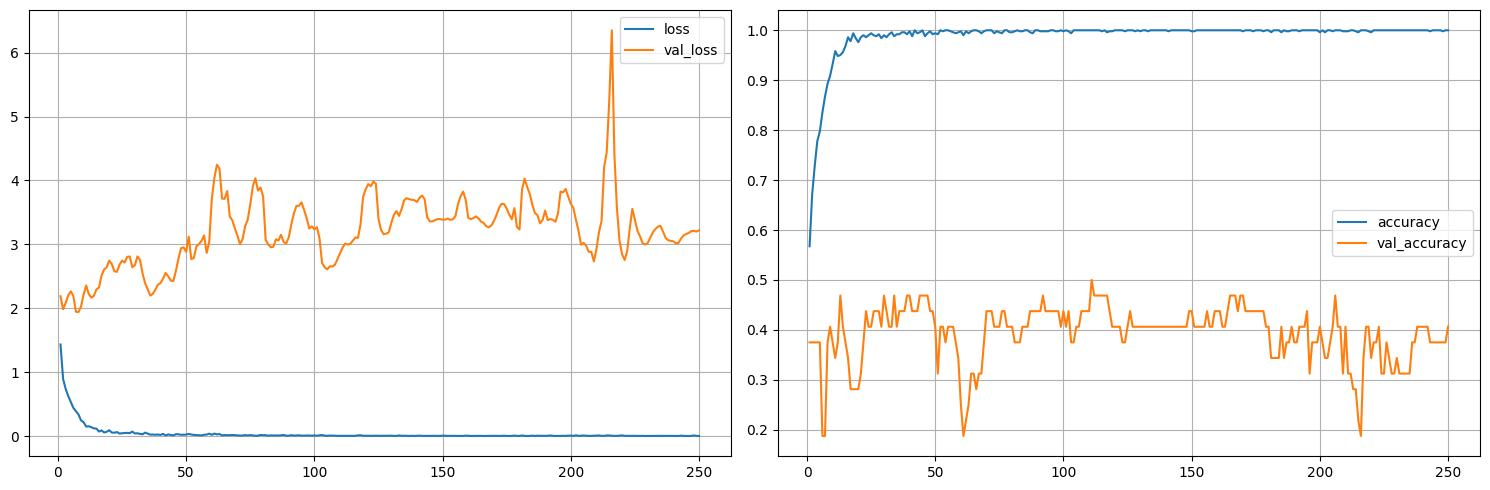

In [ ]:
#Code to use the previously found weights to load the model:


model2 = load_model(model_paths[1])
hist2 = model2.evaluate(validation_data,  batch_size = 120,
                 callbacks = callbacks_list)

3/3 [==============================] - 2s 303ms/step - loss: 3.2190 - accuracy: 0.4062


We here observe that the augmentation of data had the effect of stabilizing the accuracy of the model on the validation set to a value above 40% overall. However, the last prediction, altough much higher than the random baseline, is not better than the one obtained in the previous experiment.

This might be explained by 2 things:
-  A potential better hyperparameter tunning on the first experiment than on the second
- The introduction of data augmentation also reduced the variance. Therefore, the data points are closer to the mean and to each other, which might explain the stabilization of the value at 40%.

We also observe that adding augmented data to our dataset had the effect of increasing the loss on average on the validation set. The obtained results of a high accuracy and high loss point to the fact that our model makes less mistakes, but the mistakes it makes are larger (i.e. distance between predicted value and real value is larger).

This in turn can be explained by the context of few shot learning, as the reduced number of samples does provide enough information for every sample of every class to be correctly classified. One can also suppose that amongst the defects to select, some are more easily recognizable than others.

Basically, by introducing augmented data, the model learns better what it can learn, but does worse on the data it cannot learn.

Let's see how the model we developed competes against a deeper network with pretrained weights such as VGG16 (experiment 3).


# Experiment 3 : Using an already pre-trained neural network (VGG16)


VGG16  is a 16-layer deep neural network. VGG16 is  a relatively extensive network with a total of 138 million parameters already pre-trained. The top layers of VGG16 can be removed if need be for classification problems, which is exaclty what will be done in the following cell.

Here for example, the last layers will be replaced by a custom architecture which will be found iteratively, with the last layer being a 6 neuron layer for our 6 dimensional problem.


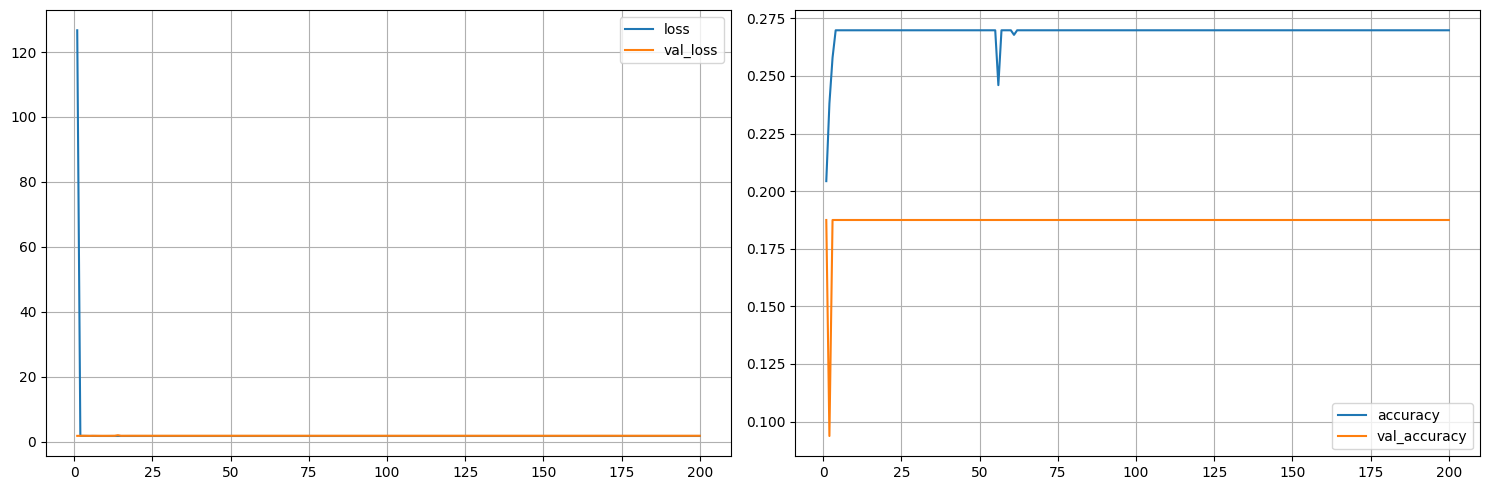

16/16 [==============================] - 7s 470ms/step - loss: 1.7571 - accuracy: 0.2698 - val_loss: 1.8228 - val_accuracy: 0.1875


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16

#Loading VGG16
base_model = tf.keras.applications.vgg16.VGG16(
    include_top=False,
    weights=None,
    input_shape = (224, 224, 3)

)


# Initialize empty lists to store images and labels
# Define the CNN model
model = models.Sequential()
model.add(base_model) #Adding VGG16 to the architecture
model.add(layers.Flatten())
model.add(layers.Dense(100, activation='relu')) #Some custom layers
model.add(layers.Dense(6, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
epochs = 200
hist = model.fit(
    new_images, new_labels,
    epochs=epochs,
    validation_data=validation_data ,
    callbacks=callbacks_list,
    batch_size = 32,
)
model.save('pre_trained_cnn.h5')


In [ ]:
#Code to use the previously found weights to load the model:


model = load_model(model_paths[2])
hist = model.evaluate(validation_data,  batch_size = 120,
                 callbacks = callbacks_list)

3/3 [==============================] - 21s 6s/step - loss: 1.8301 - accuracy: 0.1875


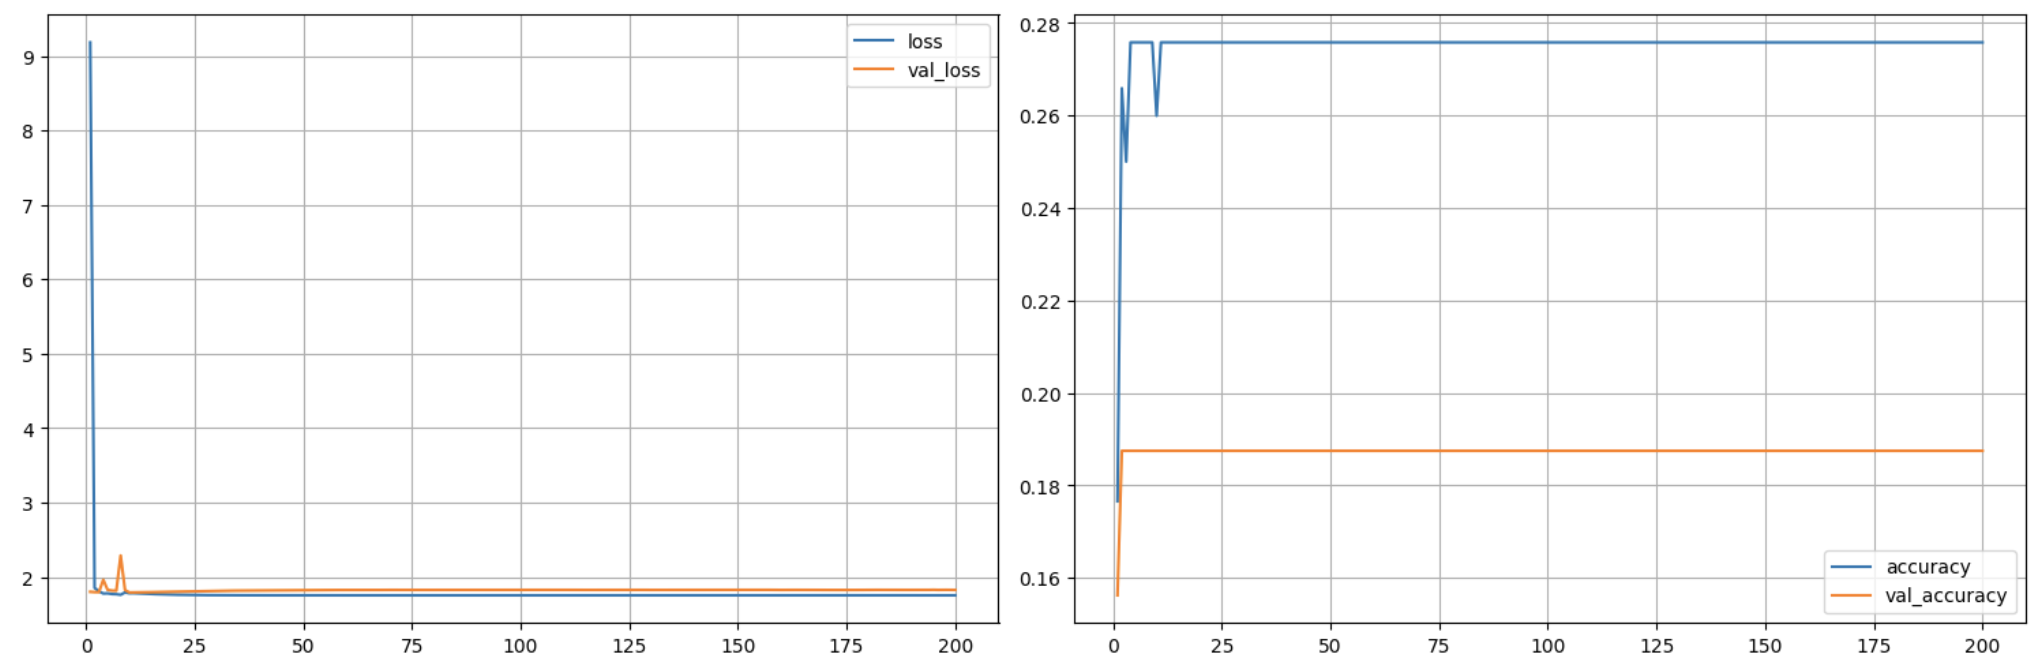

As one can see from the results above, the use of a deeper neural network architectures such as VGG16 did not improve the accuracy on the validation set either.

VGG16 achieved a low accuracy of about 18 % on the validation set.

This in turn can be explained by the fact that the VGG16 model was  trained on millions of image samples (from the imagenet dataset).
However, out of these millions of images, very few are images of screws. Moreover, inside that subset of images that are screws (onto which VGG16 was trained), very few were labeled following the defects that we are investiguating. Thus, adding this pretrained model did not improve the accuracy of our model greatly.

It is also worth mentionning that the VGG architecture (without the weights of the imagenet dataset has been implemented during training, and obtained similar results)

Another possible explanation to VGG16's performance is that the model is too deep to learn enough from 20 samples per class. Also, this model would require a much deeper fine tuning of hyperparameters to achieve the same results as the previous models from experiments 1 and 2.

Here is the same plot (of VGG16 trained on our dataset) without the weights from the imagenet dataset.


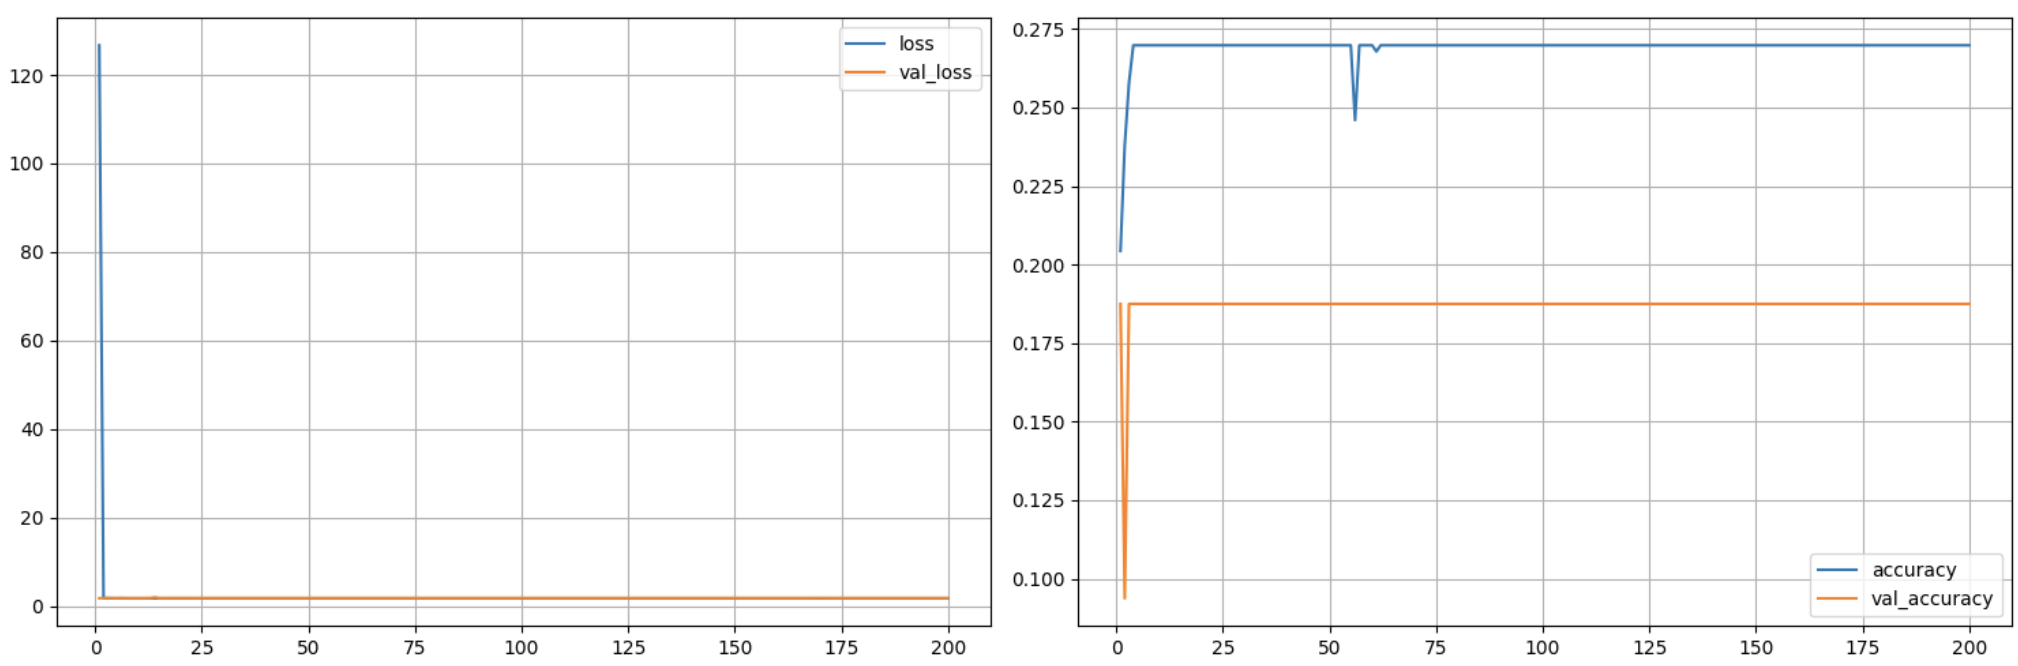

#Evaluating performance:


<ipython-input-37-3fe7ebfc1d16>:49: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


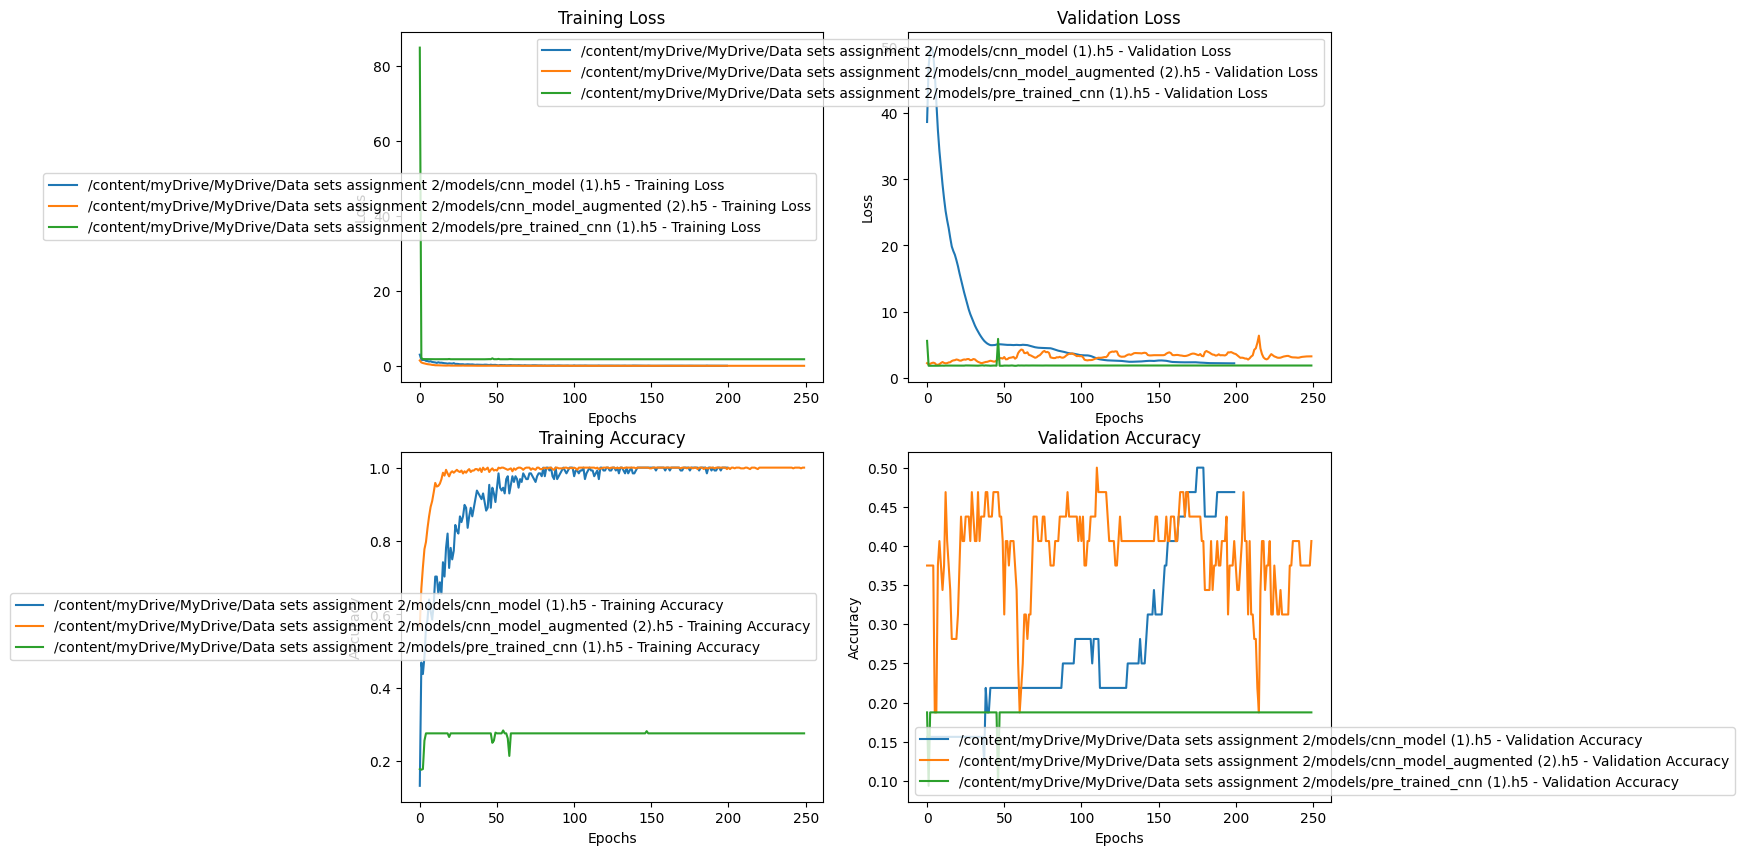

In [ ]:

# Function created to load history from a file
def load_history(file_path):
    with open(file_path, 'rb') as file:
        history = pickle.load(file)
    return history

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for model_path, history_path in zip(model_paths, history_paths):


    # Load history
    history = load_history(history_path)

    # Plot training loss
    axes[0, 0].plot(history['loss'], label=model_path + ' - Training Loss')

    # Plot validation loss if available
    if 'val_loss' in history:
        axes[0, 1].plot(history['val_loss'], label=model_path + ' - Validation Loss')

    # Plot training accuracy
    axes[1, 0].plot(history['accuracy'], label=model_path + ' - Training Accuracy')

    # Plot validation accuracy if available
    if 'val_accuracy' in history:
        axes[1, 1].plot(history['val_accuracy'], label=model_path + ' - Validation Accuracy')

axes[0, 0].set_title('Training Loss')
axes[0, 0].set_xlabel('Epochs')
axes[0, 0].set_ylabel('Loss')
axes[0, 0].legend()

axes[0, 1].set_title('Validation Loss')
axes[0, 1].set_xlabel('Epochs')
axes[0, 1].set_ylabel('Loss')
axes[0, 1].legend()

axes[1, 0].set_title('Training Accuracy')
axes[1, 0].set_xlabel('Epochs')
axes[1, 0].set_ylabel('Accuracy')
axes[1, 0].legend()

axes[1, 1].set_title('Validation Accuracy')
axes[1, 1].set_xlabel('Epochs')
axes[1, 1].set_ylabel('Accuracy')
axes[1, 1].legend()

plt.tight_layout()
plt.show()




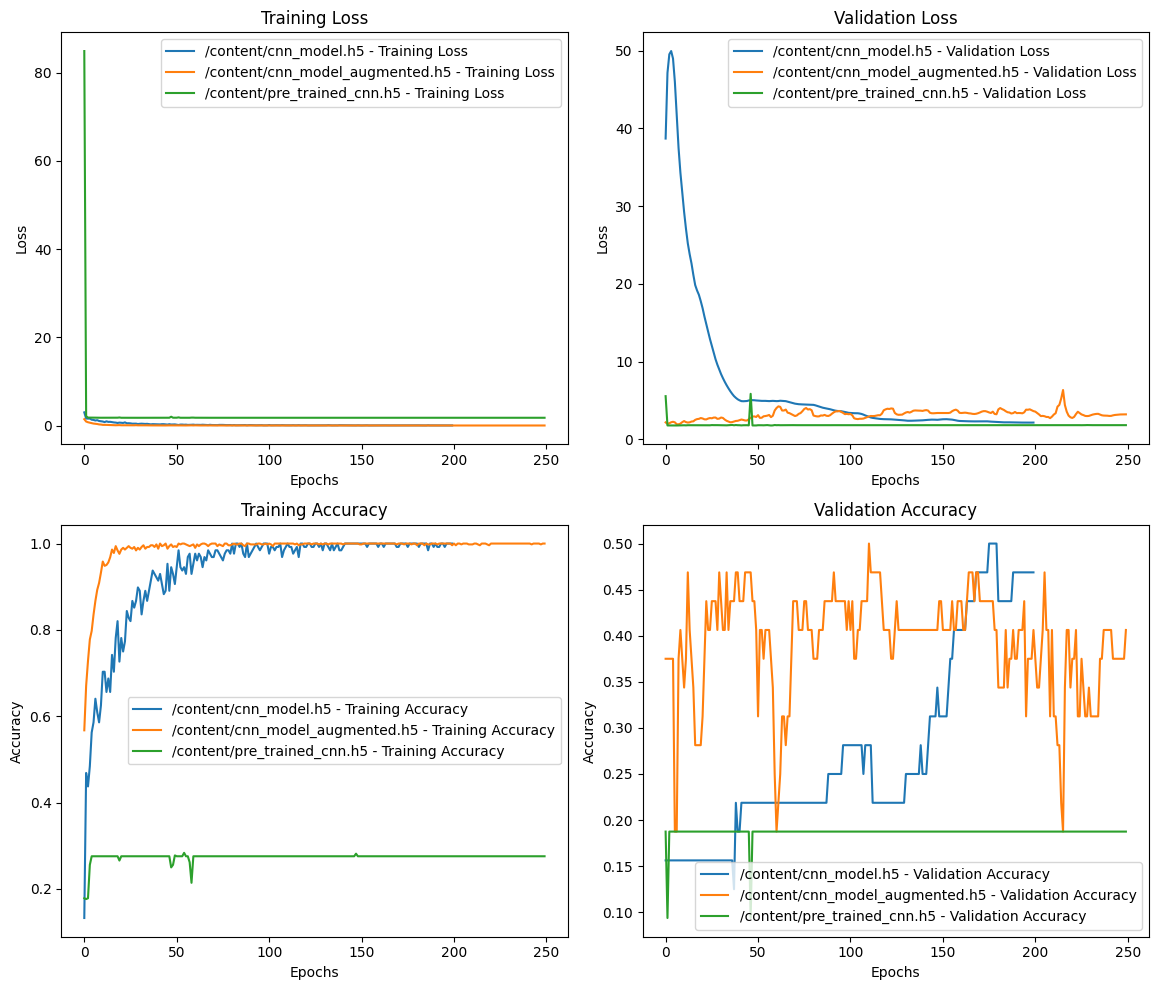

#Conclusion

We see that overall, the custom model we have developped achieves **the highest accuracy (on training and validation set)** and one of the lowest training losses. However, our model achieves one of the highest losses on the validation set towards the last periods of training.

This might be explained by the fact that our model manages to correctly classify most samples, but fails considerably on the ones it cannot classify.

We also note that the highest accuracy achieved was obtained for augmented data.

**Overall, we have achieved an accuracy of about 50% on the validation set, which is much more than expected in the first place.** This was achieved thanks to a model that was deep enough to allow for correct learning on 20 samples per class, but shallow enough to allow for a low generalization error.

In the second part of this assignment, we will now try to implement a pre-trained meta learner neural net with previous training weights. Unlike VGG16, the model we will implement in the second part is a model specifically trained for few-shot learning environments. The name of this model is ProtoNet[5].

# References
[1]E. Westphal and H. Seitz, “A machine learning method for defect detection and visualization in selective laser sintering based on convolutional neural networks,” Additive Manufacturing, vol. 41, p. 101965, May 2021, doi: https://doi.org/10.1016/j.addma.2021.101965.

[2] “Understanding VGG16: Concepts, architecture, and performance,” Datagen, https://datagen.tech/guides/computer-vision/vgg16/#:~:text=VGG16%2C%20as%20its%20name%20suggests,architecture%20is%20its%20main%20attraction. (accessed Nov. 27, 2023).
‌

[3]“Understanding Few-Shot Learning in Computer Vision: What You Need to Know,” neptune.ai, Dec. 15, 2020. https://neptune.ai/blog/understanding-few-shot-learning-in-computer-vision
‌

[4]“saved_models/tutorial16 at main · phlippe/saved_models,” GitHub. https://github.com/phlippe/saved_models/tree/main/tutorial16 (accessed Nov. 28, 2023).
‌

[5] Prototypical networks for few-shot learning - department of computer ..., https://www.cs.toronto.edu/~zemel/documents/prototypical_networks_nips_2017.pdf (accessed Dec. 3, 2023).